In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from email.utils import mktime_tz, parsedate_tz, parseaddr
import matplotlib.dates as mdates
from helper_functions import plt, load_emails

In [3]:
messages = load_emails()

In [4]:
def plot_messages(messages, title="Emails per month", resample="M"):
    dates = [datetime.fromtimestamp(mktime_tz(parsedate_tz(message["Date"]))) for message in messages]
    df = pd.DataFrame(dates, columns=["datetime"])

    df.index = df["datetime"]
    chart = df.resample(resample).count().plot(legend=None, marker='o')
    chart.set_xlabel("Month")
    chart.set_ylabel("Emails")
    chart.set_title(title)

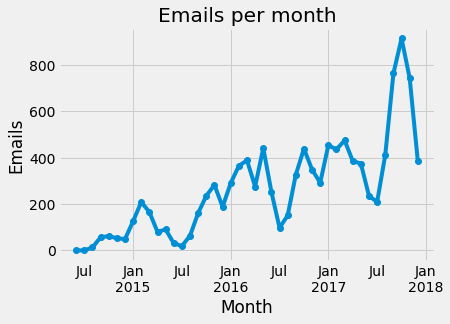

In [5]:
plot_messages(messages)

In [6]:
def parse_sender(message):
    return parseaddr(message["From"])[1]

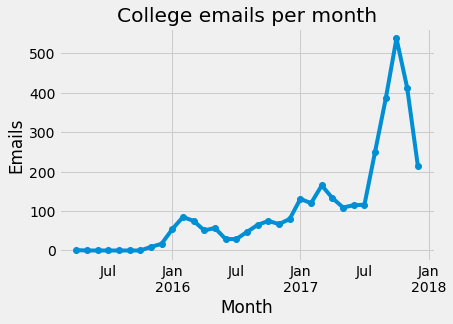

In [7]:
from_colleges = [message for message in messages if parse_sender(message).endswith(".edu")]
plot_messages(from_colleges, title="College emails per month")

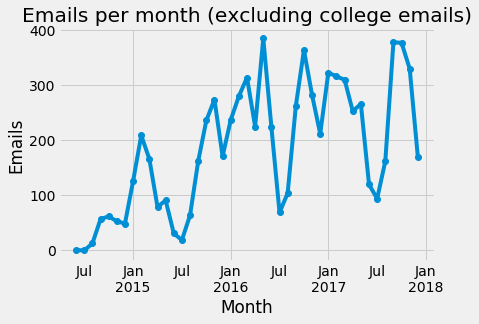

In [8]:
not_from_colleges = [message for message in messages if not parse_sender(message).endswith(".edu")]
plot_messages(not_from_colleges, title="Emails per month (excluding college emails)")